# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [1]:
!pip install nltk
import requests
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached regex-2022.8.17-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (752 kB)


Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [2]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
myStopWords = list(punctuation) + stopwords.words('english')
sid = vader.SentimentIntensityAnalyzer()

## Macbeth

Make a list of the words in Macbeth by tokenizing the macbeth_string:

In [5]:
words = word_tokenize(macbeth_string)
print(words)

['cover', 'macbeth', 'by', 'william', 'shakespeare', 'contents', 'act', 'i', 'scene', 'i.', 'an', 'open', 'place', '.', 'scene', 'ii', '.', 'a', 'camp', 'near', 'forres', '.', 'scene', 'iii', '.', 'a', 'heath', '.', 'scene', 'iv', '.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'v.', 'inverness', '.', 'a', 'room', 'in', 'macbethâ\x80\x99s', 'castle', '.', 'scene', 'vi', '.', 'the', 'same', '.', 'before', 'the', 'castle', '.', 'scene', 'vii', '.', 'the', 'same', '.', 'a', 'lobby', 'in', 'the', 'castle', '.', 'act', 'ii', 'scene', 'i.', 'inverness', '.', 'court', 'within', 'the', 'castle', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'scene', 'iv', '.', 'the', 'same', '.', 'without', 'the', 'castle', '.', 'act', 'iii', 'scene', 'i.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'another', 'room', 'in', 'the', 'palace', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'a', 'park'

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.

Write a for loop that iterates over your Macbeth word list, and:
* if the compound score of a word is positive, add the word to the positive-word list
* if the compound score of a word is negative, add the word to the negative-word list

In [6]:
sid = vader.SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in words:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)                

#print('Positive:',pos_word_list)        
#print('Neutral:',neu_word_list)    
#print('Negative:',neg_word_list) 
#score = sid.polarity_scores(words)
#print('\nScores:', score)

For any list `mylist`, you can get the word frequencies of words in `mylist` using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.

Use these commands to:
1. find the 15 most common negative words in Macbeth and the 15 most common positive words
2. make a horizontal bar plot similar to the plots in the following
3. comment on similarities and differences to the Macbeth plot below

(Plot taken from https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/)

![Pos-Neg-Words in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-19-1.png)

In [7]:
# Code:
#15 most common negative words 
nltk.FreqDist(neg_word_list).most_common(15)


[('no', 67),
 ('witch', 52),
 ('fear', 33),
 ('murderer', 33),
 ('death', 20),
 ('strange', 16),
 ('poor', 16),
 ('bloody', 15),
 ('dead', 14),
 ('fight', 11),
 ('cry', 9),
 ('fears', 8),
 ('hell', 8),
 ('murderers', 7),
 ('devil', 7)]

In [8]:
#15 most common positive words
nltk.FreqDist(pos_word_list).most_common(15)

[('good', 52),
 ('like', 40),
 ('well', 34),
 ('great', 31),
 ('hand', 22),
 ('love', 19),
 ('worthy', 17),
 ('heaven', 15),
 ('god', 12),
 ('noble', 12),
 ('pray', 12),
 ('welcome', 11),
 ('honour', 10),
 ('peace', 10),
 ('grace', 10)]

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#Assiginig most common negative and positive worlds to a variable
negWords = nltk.FreqDist(neg_word_list).most_common(15)
posWords = nltk.FreqDist(pos_word_list).most_common(15)
#Adding the variables into a dataframe, so I can plot the information necessary
#Manilupaling colums name, so I can use it as reference whne plotting the information
#xn = x of negative
#yn = y of negative
#xp = x of postitive
#yp = y of positive
dfNeg=pd.DataFrame(negWords, columns=["xn", "yn"])
dfPos=pd.DataFrame(posWords, columns=["xp", "yp"])

<AxesSubplot:title={'center':'Positive'}, ylabel='Words'>

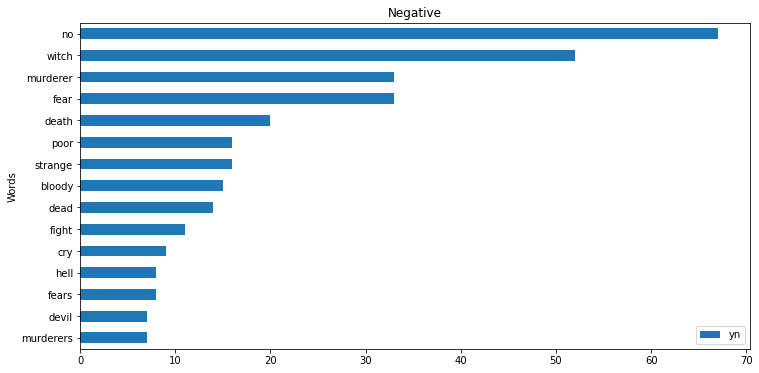

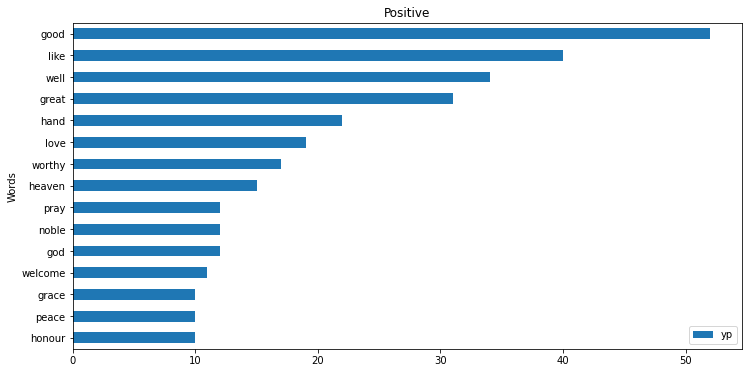

In [14]:
dfNeg.sort_values(by='yn').plot(x='xn', y='yn', kind='barh',xlabel='Words', title='Negative', figsize=(12,6))
   
dfPos.sort_values(by='yp').plot(x='xp', y='yp', kind='barh',xlabel='Words', title='Positive', figsize=(12,6))


# Make this a markdown cell for your comments:

On the ogirinal plot there is no nostopwords, on the graph that I ploted there is stopworlds on it. also a few worlds has different count numbers.

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

In [15]:
# Code:
#Removing Stoping words
wordsNoStop = []
for i in words:
    if i not in myStopWords:
        wordsNoStop.append(i)
#print(words)
#print(wordsNoStop)


In [16]:
sid = vader.SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in wordsNoStop:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word) 

In [17]:
#15 most common negative words 
nltk.FreqDist(neg_word_list).most_common(15)

[('witch', 52),
 ('fear', 33),
 ('murderer', 33),
 ('death', 20),
 ('strange', 16),
 ('poor', 16),
 ('bloody', 15),
 ('dead', 14),
 ('fight', 11),
 ('cry', 9),
 ('fears', 8),
 ('hell', 8),
 ('murderers', 7),
 ('devil', 7),
 ('died', 7)]

In [18]:
#15 most common positive words
nltk.FreqDist(pos_word_list).most_common(15)

[('good', 52),
 ('like', 40),
 ('well', 34),
 ('great', 31),
 ('hand', 22),
 ('love', 19),
 ('worthy', 17),
 ('heaven', 15),
 ('god', 12),
 ('noble', 12),
 ('pray', 12),
 ('welcome', 11),
 ('honour', 10),
 ('peace', 10),
 ('grace', 10)]

<AxesSubplot:title={'center':'Positive'}, ylabel='Words'>

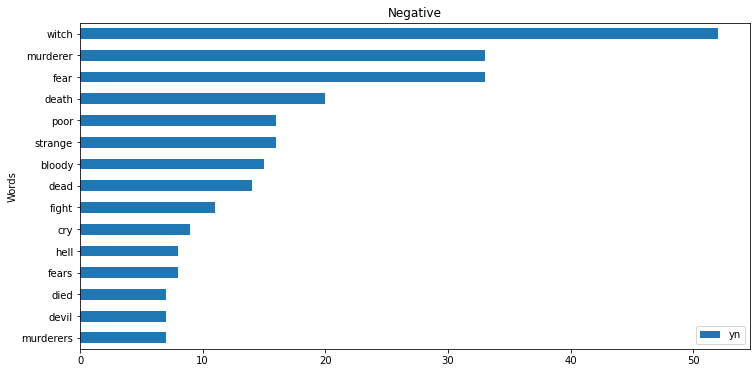

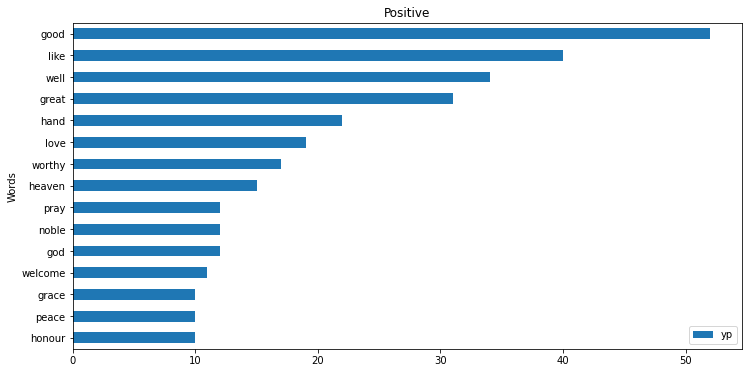

In [20]:
negWords = nltk.FreqDist(neg_word_list).most_common(15)
dfNeg=pd.DataFrame(negWords, columns=["xn", "yn"])
posWords = nltk.FreqDist(pos_word_list).most_common(15)
dfPos=pd.DataFrame(posWords, columns=["xp", "yp"])


dfNeg.sort_values(by='yn').plot(x='xn', y='yn', kind='barh',xlabel='Words', title='Negative', figsize=(12,6))
   
dfPos.sort_values(by='yp').plot(x='xp', y='yp', kind='barh',xlabel='Words', title='Positive', figsize=(12,6))

# Make this a markdown cell for your comments:

I removed nostop workds and run everything again. I noticed that a few world count is a bit different from the origitanl plot

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

In [22]:
# Code:

wordPorterStems = [PorterStemmer().stem(w) for w in words]

In [23]:
#Removing Stoping words from wordsNoStop2 Potter stem
wordsNoStop2 = []
for i in wordPorterStems:
    if i not in myStopWords:
        wordsNoStop2.append(i)

In [24]:
sid = vader.SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in wordsNoStop2:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word) 

In [25]:
#15 most common negative words 
nltk.FreqDist(neg_word_list).most_common(15)

[('witch', 58),
 ('murder', 50),
 ('fear', 42),
 ('death', 20),
 ('poor', 16),
 ('dead', 14),
 ('die', 13),
 ('fight', 12),
 ('shake', 9),
 ('doubt', 8),
 ('hell', 8),
 ('sorrow', 8),
 ('devil', 7),
 ('harm', 7),
 ('grave', 7)]

In [26]:
#15 most common positive words
nltk.FreqDist(pos_word_list).most_common(15)

[('good', 54),
 ('like', 40),
 ('well', 34),
 ('hand', 34),
 ('great', 34),
 ('love', 25),
 ('ha', 21),
 ('heaven', 17),
 ('friend', 15),
 ('honour', 14),
 ('grace', 13),
 ('thank', 13),
 ('god', 12),
 ('hope', 12),
 ('pray', 12)]

<AxesSubplot:title={'center':'Positive'}, ylabel='Words'>

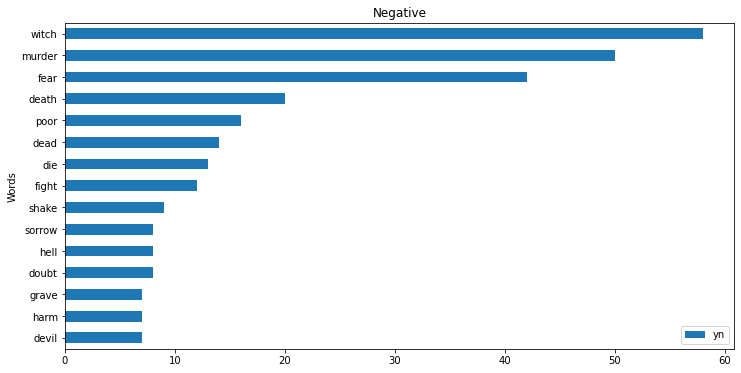

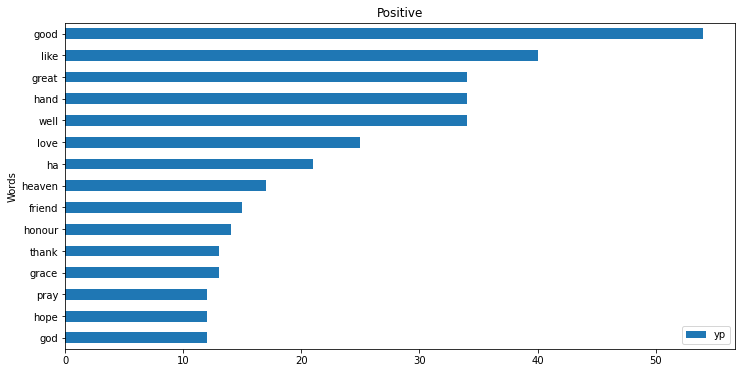

In [28]:
negWords = nltk.FreqDist(neg_word_list).most_common(15)
dfNeg=pd.DataFrame(negWords, columns=["xn", "yn"])
posWords = nltk.FreqDist(pos_word_list).most_common(15)
dfPos=pd.DataFrame(posWords, columns=["xp", "yp"])


dfNeg.sort_values(by='yn').plot(x='xn', y='yn', kind='barh',xlabel='Words', title='Negative', figsize=(12,6))
   
dfPos.sort_values(by='yp').plot(x='xp', y='yp', kind='barh',xlabel='Words', title='Positive', figsize=(12,6))

# Make this a markdown cell for your comments:

## Negative "deed, die, shake, hell, grave"


## Positive "great, ha, thank"

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):
![Sentiment Evolution in Shakespeare](https://peerchristensen.netlify.com/post/2018-06-07-fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies_files/figure-html/unnamed-chunk-11-1.png)

We are going to make a couple different plots.

First:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by summing the compound scores of all the words in that scene
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

In [29]:
# Code:
dfall = pd.DataFrame({'scenes':r_j_scenes})


In [30]:
def getSentiment(scenes):
    return sid.polarity_scores(scenes)['compound']

In [31]:
dfall['VaderSentiment'] = [getSentiment(scenes) for scenes in dfall['scenes']]

In [32]:
dfall.loc[(dfall['VaderSentiment']>0),'scenes'].count()

17

In [33]:
dfall.loc[(dfall['VaderSentiment']<0),'scenes'].count()

8

<AxesSubplot:title={'center':'Scenes'}, xlabel='Scenes Number'>

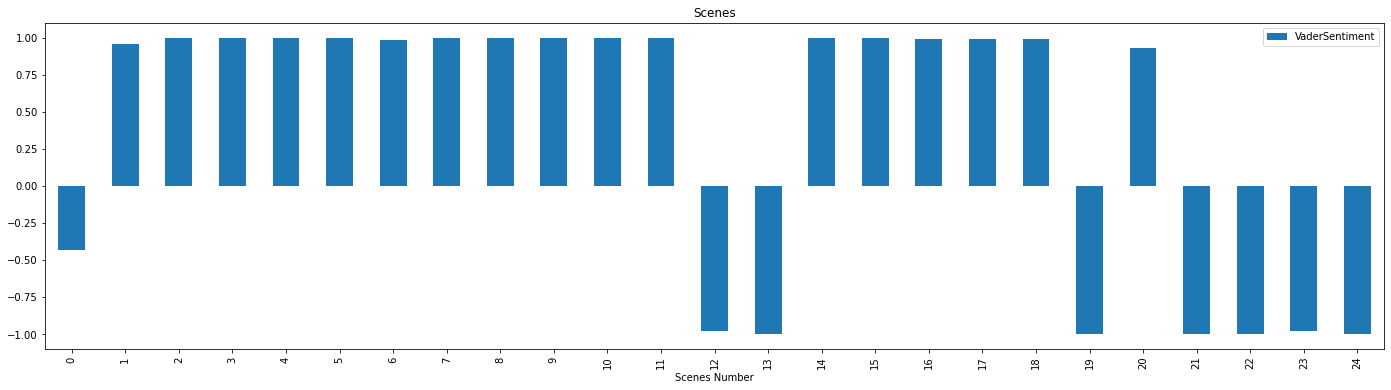

In [34]:
dfall.plot(kind='bar',xlabel='Scenes Number', title='Scenes', figsize=(24,6))

# Make this a markdown cell for your comments:

According to the plot and the count we are able to identify more positive scenes (17) than negative scenes (8)

Second:
* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

<AxesSubplot:title={'center':'Scenes'}, xlabel='Scenes Number'>

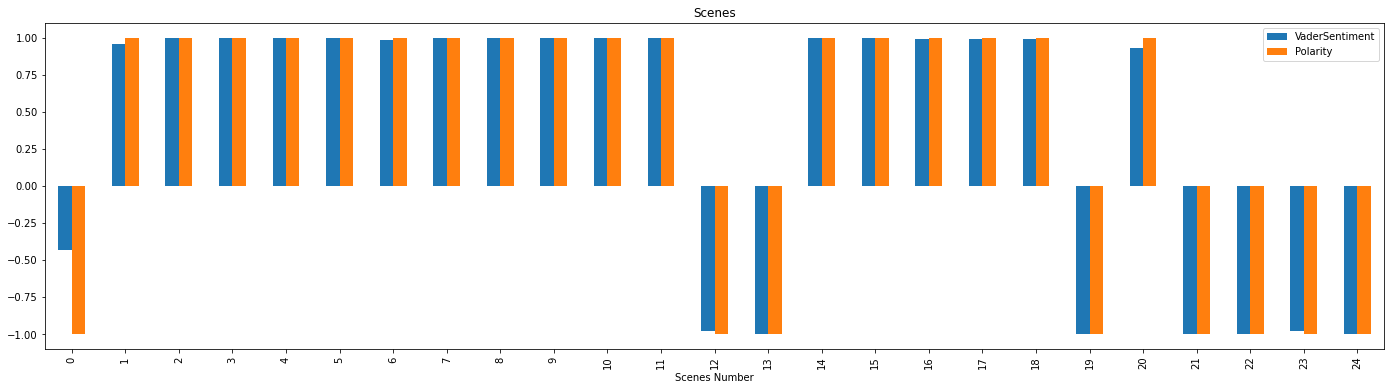

In [35]:
# Code:

# Code:
dfall = pd.DataFrame({'scenes':r_j_scenes})

def getSentiment(scenes):
    return sid.polarity_scores(scenes)['compound']

dfall['VaderSentiment'] = [getSentiment(scenes) for scenes in dfall['scenes']]

dfall['Polarity'] = np.where(dfall['VaderSentiment']>0, 1, -1)
dfall.plot(kind='bar',xlabel='Scenes Number', title='Scenes', figsize=(24,6))

In [36]:
dfall

,scenes,VaderSentiment,Polarity
0,. during the greater part of the play in veron...,-0.4310,-1
1,i. a public place.\r\n\r\n enter sampson and ...,0.9552,1
2,"ii. a street.\r\n\r\n enter capulet, paris an...",0.9992,1
3,iii. room in capuletâs house.\r\n\r\n enter...,0.9993,1
4,"iv. a street.\r\n\r\n enter romeo, mercutio, ...",0.9959,1
5,v. a hall in capuletâs house.\r\n\r\n music...,0.9996,1
6,i. an open place adjoining capuletâs garden...,0.9839,1
7,ii. capuletâs garden.\r\n\r\n enter romeo.\...,0.9998,1
8,iii. friar lawrenceâs cell.\r\n\r\n enter f...,0.9993,1
9,iv. a street.\r\n\r\n enter benvolio and merc...,0.9995,1


# Make this a markdown cell for your comments:

Hi Professor on this exercise I was not sure why the polarity would matter, since we already have the sentiment analize per sentase.

Analizing the plot we can see that the number of positive and negative worlds are the same, but the Posality bar (Orange) has different format because it is not breaking into small number.

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [37]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [38]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [39]:
testword = 'love'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

love is positive


Third plot:

* Write a for loop that iterate over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

In [58]:
words2 = []
for s in r_j_scenes:
    for w in word_tokenize(s):
        words2.append(w)

In [73]:
#Removing Stoping words
wordsNoStop3 = []
for i in words2:
    if i not in myStopWords:
        wordsNoStop3.append(i)

In [74]:
sid = vader.SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in wordsNoStop3:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word) 

In [75]:
dfpos = pd.DataFrame({'words':pos_word_list, 'Polarity':1})
dfneg = pd.DataFrame({'words':neg_word_list, 'Polarity':-1})

In [79]:
df = pd.concat([dfpos,dfneg], ignore_index=True)

In [80]:
def getSentiment(scenes):
    return sid.polarity_scores(scenes)['compound']


In [81]:
df['VaderSentiment'] = [getSentiment(scenes) for scenes in df['words']]

<AxesSubplot:title={'center':'Scenes'}, xlabel='Scenes Number'>

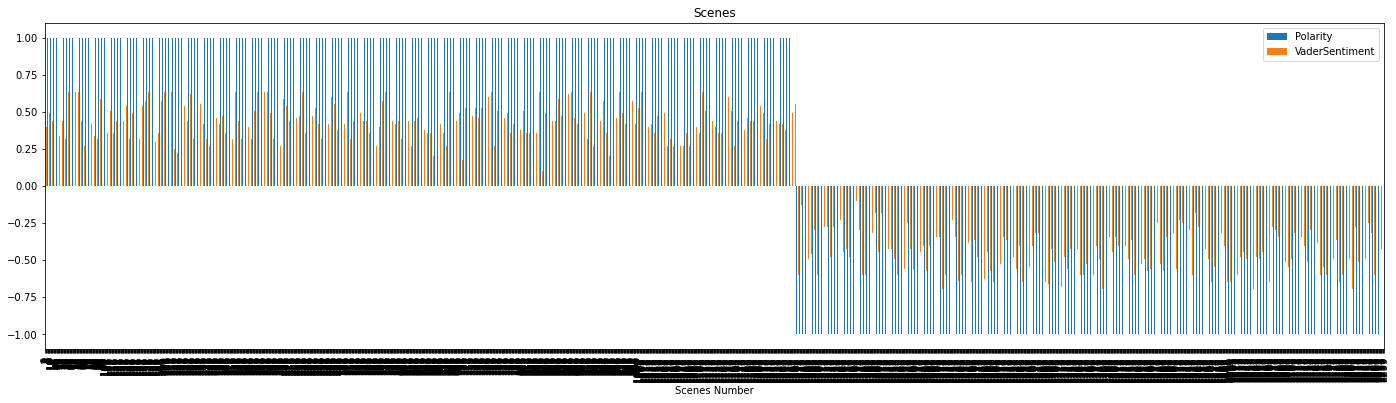

In [82]:
df.plot(kind='bar',xlabel='Scenes Number', title='Scenes', figsize=(24,6))

# Make this a markdown cell for your comments:

Professor. I may have gone in the wrong direction of this tasks. I believe my mistake was break the strings in words.

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the positive_words and negative_words sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

In [127]:
# Code:
words4 = word_tokenize(r_j_string)
#Removing Stoping words
wordsNoStop4 = []
for i in words4:
    if i not in myStopWords:
        wordsNoStop4.append(i)
        
        
sid = vader.SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

for word in wordsNoStop4:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word) 

In [128]:
dfpos4 = pd.DataFrame({'words':pos_word_list, 'Polarity':1})
dfneg4 = pd.DataFrame({'words':neg_word_list, 'Polarity':-1})

In [129]:
df4 = pd.concat([dfpos4,dfneg4], ignore_index=True)

In [130]:
def getSentiment(scenes):
    return sid.polarity_scores(scenes)['compound']

In [131]:
df4['VaderSentiment'] = [getSentiment(scenes) for scenes in df4['words']]


In [ ]:
df4.plot(kind='bar',xlabel='words', title='Scenes', figsize=(24,6))

<AxesSubplot:title={'center':'Scenes'}, xlabel='words'>